In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [34]:
column_names=['user_id','item_id','ratings','timestamp']   #giving the column names

In [35]:
df = pd.read_csv("u.data",sep="\t",names=column_names)      #read the dataset

In [36]:
df.head()

,user_id,item_id,ratings,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [37]:
movie_titles = pd.read_csv("Movie_Id_Titles")

In [38]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [39]:
df1=pd.merge(df,movie_titles,on="item_id")        #merge the data on the bais of the item id

In [40]:
df1

,user_id,item_id,ratings,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
5,274,50,5,878944679,Star Wars (1977)
6,227,50,4,879035347,Star Wars (1977)
7,99,50,5,885679998,Star Wars (1977)
8,305,50,5,886321799,Star Wars (1977)
9,108,50,4,879879739,Star Wars (1977)


In [41]:
df11=df1.groupby('title')['ratings']                      #groupby on the basis of rating and titles..

In [10]:
rating = pd.DataFrame(df1.groupby('title')['ratings'].mean())        #calculate the mean rating of each movie..

In [11]:
rating.head()

,ratings
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [12]:
rating['no_of_raters']=df1.groupby('title')['ratings'].count()       #count the no. of users who gaves the ratings..

In [13]:
rating.head()

,ratings,no_of_raters
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


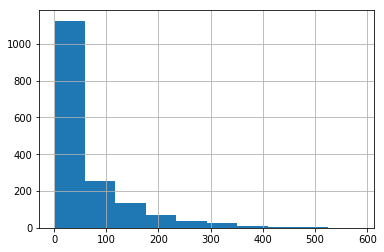

In [14]:
rating["no_of_raters"].hist()            #plot the histogram on the basis of no_of_raters

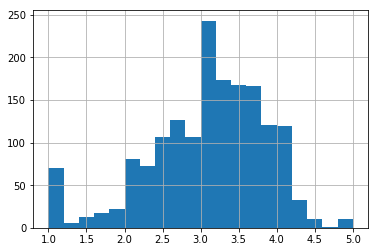

In [15]:
rating["ratings"].hist(bins=20)                 #plot the histogram on the basis ratings

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


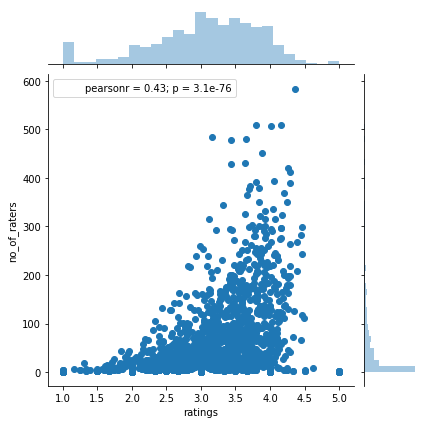

In [16]:
sns.jointplot(x="ratings", y="no_of_raters" , data=rating)     #plot the joinplot between ratings and no_of_raters

In [17]:
rating_matrix=df1.pivot_table(index="user_id", columns="title", values='ratings')    
#we design the pivot table to display which user gives ratings to which movie...

In [18]:
rating_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
rating.sort_values("no_of_raters",ascending=False)       #sort the values in descending order on the basis of no of raters...

,ratings,no_of_raters
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [20]:
Independence_Day_rating=rating_matrix['Independence Day (ID4) (1996)']     #taking the ratings of independance day movie as a example...  

In [21]:
star_wars_rating=rating_matrix['Star Wars (1977)']     

In [22]:
star_wars_rating.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [23]:
corelated_independance_day=rating_matrix.corrwith(Independence_Day_rating)  
#corrwith function gives the corelated values of that movie from the dataset..https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corrwith.html

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


In [24]:
corelated_independance_day.head()

title
'Til There Was You (1997)    0.867528
1-900 (1994)                -1.000000
101 Dalmatians (1996)        0.311182
12 Angry Men (1957)          0.134572
187 (1997)                   0.118750
dtype: float64

In [25]:
recommended_movies_independance=pd.DataFrame(corelated_independance_day,columns=["related_movies"])   
#create the extraa column in the new dataframe

In [26]:
recommended_movies_independance.head(20)     

,related_movies
title,
'Til There Was You (1997),0.867528
1-900 (1994),-1.000000
101 Dalmatians (1996),0.311182
12 Angry Men (1957),0.134572
187 (1997),0.118750
2 Days in the Valley (1996),0.150360
"20,000 Leagues Under the Sea (1954)",0.206688
2001: A Space Odyssey (1968),-0.079623
3 Ninjas: High Noon At Mega Mountain (1998),NaN


In [27]:
recommended_movies_independance.dropna(inplace=True)           #drop all the "nan" values...
recommended_movies_independance.head(20)

,related_movies
title,
'Til There Was You (1997),0.867528
1-900 (1994),-1.000000
101 Dalmatians (1996),0.311182
12 Angry Men (1957),0.134572
187 (1997),0.118750
2 Days in the Valley (1996),0.150360
"20,000 Leagues Under the Sea (1954)",0.206688
2001: A Space Odyssey (1968),-0.079623
"39 Steps, The (1935)",0.120075


In [28]:
recommended_movies_independance.sort_values("related_movies",ascending=False)     
#sort the values on the basis of related movies...

,related_movies
title,
No Escape (1994),1.000000
Brother Minister: The Assassination of Malcolm X (1994),1.000000
"Wonderful, Horrible Life of Leni Riefenstahl, The (1993)",1.000000
Chasers (1994),1.000000
Two or Three Things I Know About Her (1966),1.000000
Independence Day (ID4) (1996),1.000000
"Rendezvous in Paris (Rendez-vous de Paris, Les) (1995)",1.000000
C'est arrivé près de chez vous (1992),1.000000
Daniel Defoe's Robinson Crusoe (1996),1.000000


In [29]:
recommended_movies_independance=recommended_movies_independance.join(rating['no_of_raters'])    
#join the two columns with rating dataframe

In [30]:
recommended_movies_independance

,related_movies,no_of_raters
title,,
'Til There Was You (1997),0.867528,9
1-900 (1994),-1.000000,5
101 Dalmatians (1996),0.311182,109
12 Angry Men (1957),0.134572,125
187 (1997),0.118750,41
2 Days in the Valley (1996),0.150360,93
"20,000 Leagues Under the Sea (1954)",0.206688,72
2001: A Space Odyssey (1968),-0.079623,259
"39 Steps, The (1935)",0.120075,59


In [31]:
sorted_recommended_movie= recommended_movies_independance[recommended_movies_independance['no_of_raters']>75].sort_values('related_movies',ascending=False).head()  
#sort the no of raters from recommended movies which are 75 above. and sort the movies on the basis of related movie

In [32]:
sorted_recommended_movie.head()     #final result

,related_movies,no_of_raters
title,,
Independence Day (ID4) (1996),1.000000,429
"Craft, The (1996)",0.578351,104
First Knight (1995),0.566247,86
Twister (1996),0.560029,293
Down Periscope (1996),0.531194,101
